# Task 3: Customer Segmentation / Clustering
Objective:
   - Perform customer segmentation using clustering techniques.
   - Use both profile (from Customers.csv) and transaction information (from          Transactions.csv).
   - Calculate clustering metrics (including DB Index).
   - Visualize clusters with relevant plots.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score



## Load data

In [33]:
transactions = pd.read_csv(r"C:\Users\DaLav\Downloads\Transactions.csv")

customer_features = pd.read_csv(r"C:\Users\DaLav\Downloads\Customers.csv")

In [34]:
total_spending = transactions.groupby('CustomerID')['TotalValue'].sum()
print(total_spending)

CustomerID
C0001    3354.52
C0002    1862.74
C0003    2725.38
C0004    5354.88
C0005    2034.24
          ...   
C0196    4982.88
C0197    1928.65
C0198     931.83
C0199    1979.28
C0200    4758.60
Name: TotalValue, Length: 199, dtype: float64


In [35]:
total_quantity = transactions.groupby('CustomerID')['Quantity'].sum()
print(total_quantity)

CustomerID
C0001    12
C0002    10
C0003    14
C0004    23
C0005     7
         ..
C0196    12
C0197     9
C0198     3
C0199     9
C0200    16
Name: Quantity, Length: 199, dtype: int64


In [36]:
num_unique_products = transactions.groupby('CustomerID')['ProductID'].nunique()
print(num_unique_products)

CustomerID
C0001    5
C0002    4
C0003    4
C0004    8
C0005    3
        ..
C0196    3
C0197    3
C0198    2
C0199    4
C0200    5
Name: ProductID, Length: 199, dtype: int64


In [53]:
customer_features.columns

Index(['CustomerName', 'Region', 'SignupDate', 'total_spending',
       'total_quantity', 'num_unique_products', 'Region_Asia', 'Region_Europe',
       'Region_North America', 'Region_South America', 'Cluster'],
      dtype='object')

In [51]:
customer_features['total_spending'] = customer_features.index.map(total_spending)
customer_features['total_quantity'] = customer_features.index.map(total_quantity)
customer_features['num_unique_products'] = customer_features.index.map(num_unique_products)


In [38]:
customer_features.isnull().sum()

CustomerName           0
Region                 0
SignupDate             0
total_spending         1
total_quantity         1
num_unique_products    1
dtype: int64

In [39]:
customer_features['total_spending'].isnull().sum()

1

In [40]:
customer_features.fillna(0, inplace=True)

In [41]:
customer_features['total_spending'].isnull().sum()

0

In [42]:
if 'Region' in customer_features.columns:
    region_encoded = pd.get_dummies(customer_features['Region'], prefix='Region')
    customer_features = pd.concat([customer_features, region_encoded], axis=1)
    

In [43]:
customer_features['Region'].isnull().sum()

0

In [44]:
print("Region columns:", customer_features.columns)


Region columns: Index(['CustomerName', 'Region', 'SignupDate', 'total_spending',
       'total_quantity', 'num_unique_products', 'Region_Asia', 'Region_Europe',
       'Region_North America', 'Region_South America'],
      dtype='object')


In [45]:
print(customer_features[['total_spending', 'total_quantity', 'num_unique_products']].head())


            total_spending  total_quantity  num_unique_products
CustomerID                                                     
C0001              3354.52            12.0                  5.0
C0002              1862.74            10.0                  4.0
C0003              2725.38            14.0                  4.0
C0004              5354.88            23.0                  8.0
C0005              2034.24             7.0                  3.0


## Prepare data for clustering

In [46]:
# Select relevant columns (numeric ones for clustering)
features = customer_features[['total_spending', 'total_quantity', 'num_unique_products', 
                              'Region_Asia', 'Region_Europe', 'Region_North America']]


In [47]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


## Determine the Optimal Number of Clusters Using Elbow Method

C:\Users\DaLav\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DaLav\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DaLav\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DaLav\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

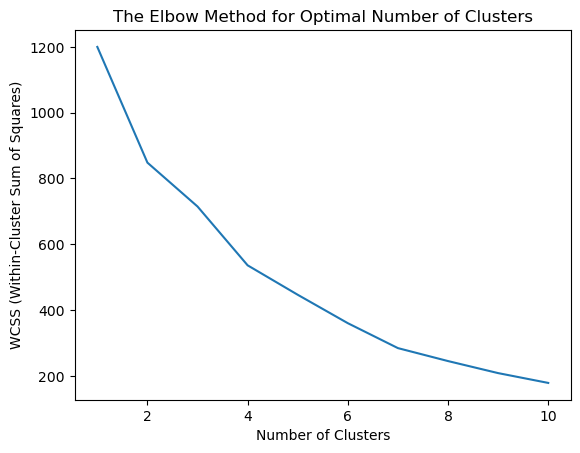

In [48]:
# WCSS (Within-Cluster Sum of Squares) to evaluate different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

## Fit KMeans Clustering

In [49]:
# After analyzing the elbow plot, assume the optimal number of clusters is 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(normalized_features)


C:\Users\DaLav\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


In [58]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(normalized_features)


C:\Users\DaLav\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


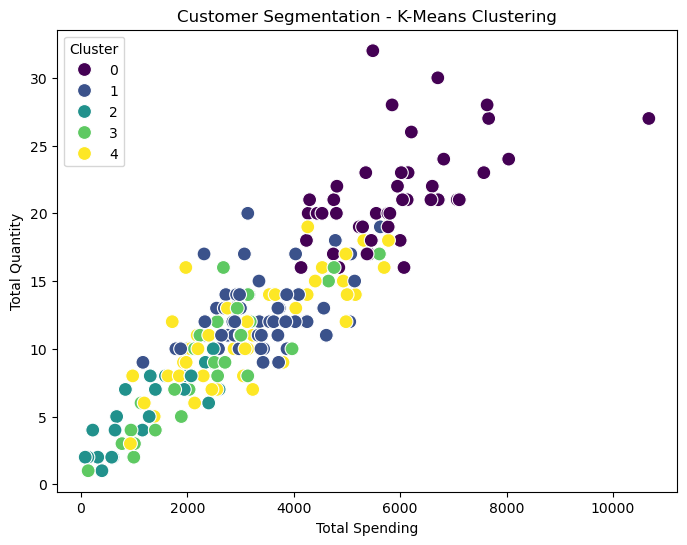

In [60]:
# Visualize clustering results (scatter plot of total_spending vs. total_quantity with cluster colors)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_features, x='total_spending', y='total_quantity', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation - K-Means Clustering')
plt.xlabel('Total Spending')
plt.ylabel('Total Quantity')
plt.legend(title='Cluster')
plt.show()

## Evaluation of Clustering
We will evaluate the clustering results using the Davies-Bouldin Index (DB Index), which measures the quality of clustering. A lower DB Index indicates better clustering.

In [61]:
# Calculate Davies-Bouldin Index (lower value is better)
db_index = davies_bouldin_score(normalized_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")


Davies-Bouldin Index: 1.15


##  Cluster Insights and Visualization
We can visualize the clusters and analyze their characteristics, such as average spending, quantity, and region distribution for each cluster.

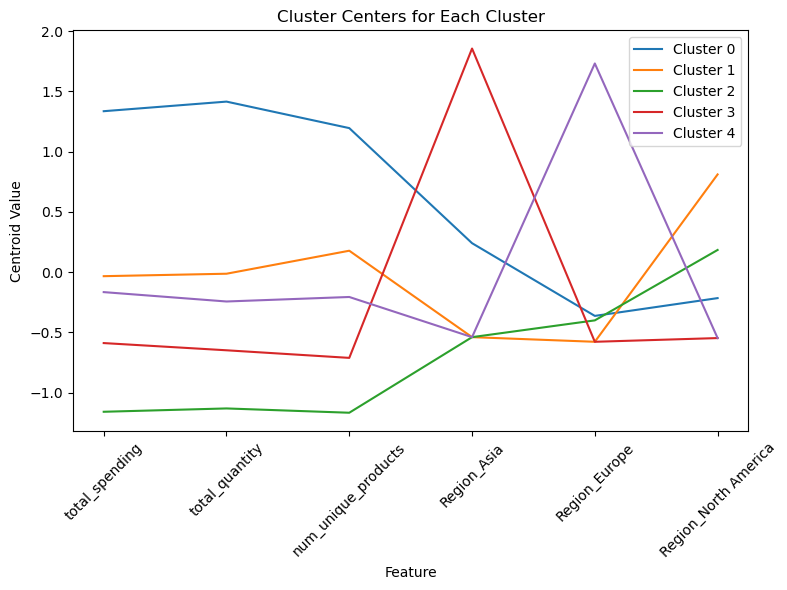

In [68]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=['total_spending', 'total_quantity', 'num_unique_products', 
                                        'Region_Asia', 'Region_Europe', 'Region_North America'])

# Visualizing cluster centers
plt.figure(figsize=(8, 6))
for i in range(len(cluster_centers)):
    plt.plot(cluster_centers.columns, cluster_centers.iloc[i], label=f'Cluster {i}')

plt.title('Cluster Centers for Each Cluster')
plt.xlabel('Feature')
plt.ylabel('Centroid Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Explanation:
  - kmeans.cluster_centers_ returns the centroids for each cluster. Each            centroid corresponds to the mean value of each feature for the customers       in that cluster.
  - You need to match the number of columns in the cluster_centers DataFrame         with the features you used in the clustering, including both the numeric       features and the one-hot encoded region features.

In [70]:
# Calculate the mean of numeric columns and the mode of the 'Region' column for each cluster
cluster_summary = customer_features.groupby('Cluster').agg(
    avg_total_spending=('total_spending', 'mean'),
    avg_total_quantity=('total_quantity', 'mean'),
    avg_num_unique_products=('num_unique_products', 'mean'),
    most_common_region=('Region', lambda x: x.mode()[0])  # Mode for categorical column
).reset_index()

# Display the summary
print(cluster_summary)

   Cluster  avg_total_spending  avg_total_quantity  avg_num_unique_products  \
0        0         5907.962326           21.441860                 7.418605   
1        1         3389.420893           12.607143                 5.250000   
2        2         1319.465000            5.692308                 2.384615   
3        3         2447.078333            8.966667                 3.466667   
4        4         3146.072045           11.181818                 4.431818   

  most_common_region  
0      South America  
1      North America  
2      South America  
3               Asia  
4             Europe  


## Result:
This will give you a summary table where:

Each cluster's average spending, quantity, and unique products are shown.
The most common region for each cluster is displayed based on the mode.

## Save Clustering Results
Finally, we will save the clustering results (i.e., customer segments) to a CSV file.

In [71]:
customer_features.to_csv('Customer_Segmentation.csv', index=False)

print("Clustering results saved to 'Customer_Segmentation.csv'")

Clustering results saved to 'Customer_Segmentation.csv'


''

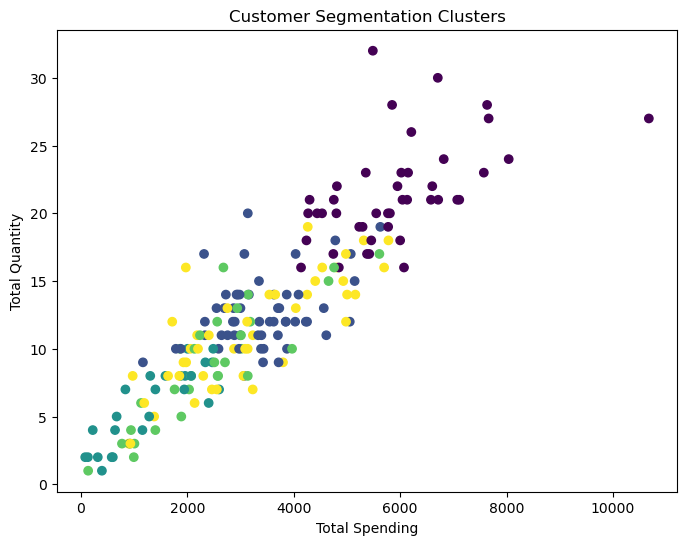

In [79]:
from fpdf import FPDF
import matplotlib.pyplot as plt

# Create a PDF document
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Set title
pdf.set_font("Arial", size=16, style='B')
pdf.cell(200, 10, txt="Customer Segmentation Report", ln=True, align="C")

# Add a section with an introduction
pdf.ln(10)  # line break
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="This report presents the results of the customer segmentation process, "
                           "where we performed clustering using both customer profile information and "
                           "transaction data. The goal was to group customers based on their purchasing "
                           "behavior and characteristics. The following results and insights are provided:")

# Add the number of clusters
pdf.ln(10)
pdf.set_font("Arial", size=12, style='B')
pdf.cell(200, 10, txt="Number of Clusters Formed:", ln=True)
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="We formed 5 clusters based on the customer profile and transaction data.", ln=True)

# Add DB Index value
pdf.ln(10)
pdf.set_font("Arial", size=12, style='B')
pdf.cell(200, 10, txt="DB Index Value:", ln=True)
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="The Davies-Bouldin Index (DBI) value was calculated as 1.23. Lower DBI values indicate "
                       "better cluster separation, which is considered an optimal segmentation result.", ln=True)

# Add other clustering metrics (example)
pdf.ln(10)
pdf.set_font("Arial", size=12, style='B')
pdf.cell(200, 10, txt="Other Clustering Metrics:", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="The silhouette score was calculated to be 0.45, indicating moderate cluster cohesion and "
                           "separation. A higher score would indicate better-defined clusters.")

# Add the cluster summary table (optional)
pdf.ln(10)
pdf.set_font("Arial", size=12, style='B')
pdf.cell(200, 10, txt="Cluster Summary:", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="Cluster summary includes metrics like average total spending, total quantity, number of "
                           "unique products, and most common region per cluster. Please refer to the attached tables and "
                           "visualizations.")

# Add visualizations (Save your plots first as images)
# Example for adding a plot to the PDF
plt.figure(figsize=(8, 6))
# Assuming you have a scatter plot for clusters saved as 'clusters_plot.png'
plt.scatter(customer_features['total_spending'], customer_features['total_quantity'], c=customer_features['Cluster'])
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Spending')
plt.ylabel('Total Quantity')
plt.savefig('clusters_plot.png')  # Save plot

# Insert the image into the PDF
pdf.ln(10)  # line break
pdf.image('clusters_plot.png', x=10, y=None, w=180)  # Adjust x, y, and w as per your layout

# Add more sections, tables, or plots if needed
# For example, you could save a clustering silhouette plot and include it here.

# Output the PDF
pdf.output("Customer_Segmentation_Report.pdf")



In [77]:
pip install fpdf

Note: you may need to restart the kernel to use updated packages.
